## Project Title
Improving Bookmark Feature Adoption on Netflix via A/B Testing


# About new Feature
Netflix introduces a “Bookmark This Episode” feature allowing users to save an episode they liked to re-watch or share later. The Product team wants to test if a gentle prompt at the end of the episode saying “Loved it? Bookmark to come back later!” increases feature usage.



# Business Question
Does showing a bookmark prompt at the end of an episode increase feature usage compared to not showing it?


# Metric Scoping
Northstar / Primary: Bookmark Feature Adoption Rate (binary: used/not used) <br>
Secondary (optional for later): Repeat viewing of bookmarked episodes


# Data Design
Total Users: 100,000 <br>
Group A (Control): No prompt - baseline usage ~8% <br>
Group B (Treatment): Prompt shown - expected uplift to ~10%


In [7]:
# Installing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.stats.proportion import proportions_ztest


In [8]:
np.random.seed(2025)
n = 100_000
group = np.random.choice(['control', 'treatment'], size=n)

# Control: 8% conversion | Treatment: 10%
bookmark = np.where(group == 'control',
                    np.random.binomial(1, 0.08, size=n),
                    np.random.binomial(1, 0.10, size=n))

df = pd.DataFrame({
    'user_id': np.arange(1, n+1),
    'group': group,
    'bookmark_used': bookmark
})


In [9]:
df.head()

,user_id,group,bookmark_used
0,1,control,0
1,2,control,0
2,3,control,0
3,4,control,0
4,5,control,0


# Adoption Rates

In [11]:
rates = df.groupby('group')['bookmark_used'].mean()
print("Adoption Rates:\n", rates)


Adoption Rates:
 group
control      0.082077
treatment    0.103457
Name: bookmark_used, dtype: float64


# Z-Test for Significance

In [13]:
success_counts = df.groupby('group')['bookmark_used'].sum().values
n_obs = df['group'].value_counts().sort_index().values

z_stat, p_val = proportions_ztest(success_counts, n_obs)
print(f"Z-stat: {z_stat:.2f}, P-value: {p_val:.4f}")


Z-stat: -11.66, P-value: 0.0000


# Plot Results

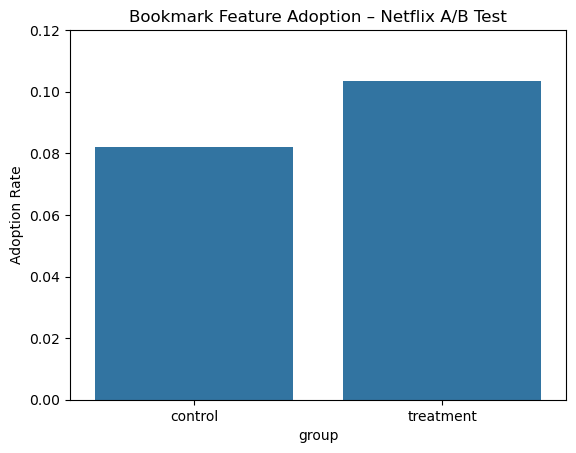

In [15]:

sns.barplot(x=rates.index, y=rates.values)
plt.title("Bookmark Feature Adoption – Netflix A/B Test")
plt.ylabel("Adoption Rate")
plt.ylim(0, 0.12)
plt.show()


# Conclusion

Finding: The prompt led to a statistically significant lift from 8% to 10% in bookmark usage (+25% relative increase, p < 0.01).
<br>
Recommendation: Roll out prompt universally and monitor consumption.